In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
mpl.style.use('seaborn-v0_8-darkgrid')

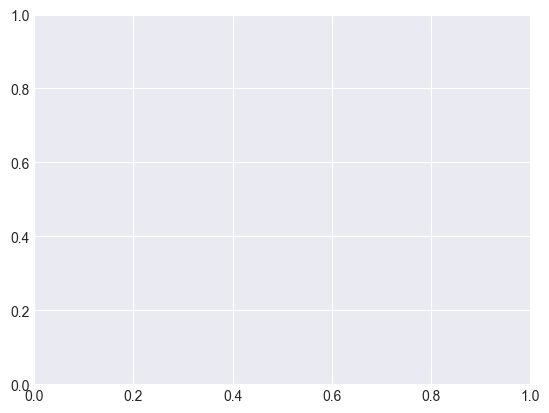

In [5]:
fig, ax = plt.subplots()

In [6]:
x_pts = np.linspace(-2 * np.pi, 2 * np.pi, 200)
y_pts = np.sin(x_pts)
ax.plot(x_pts, y_pts, label='sin')

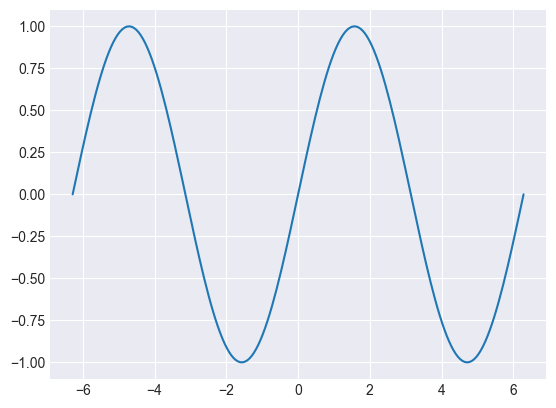

In [7]:
fig

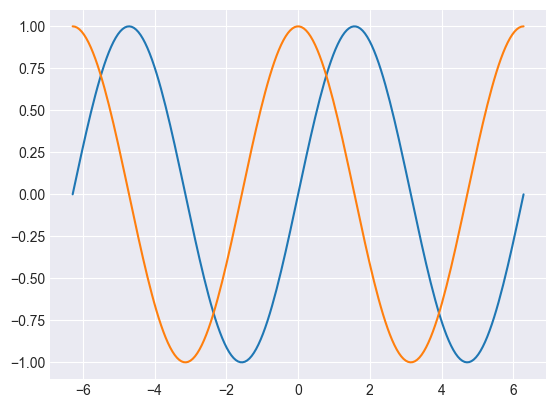

In [8]:
ax.plot(x_pts, np.cos(x_pts), label='cos')
fig

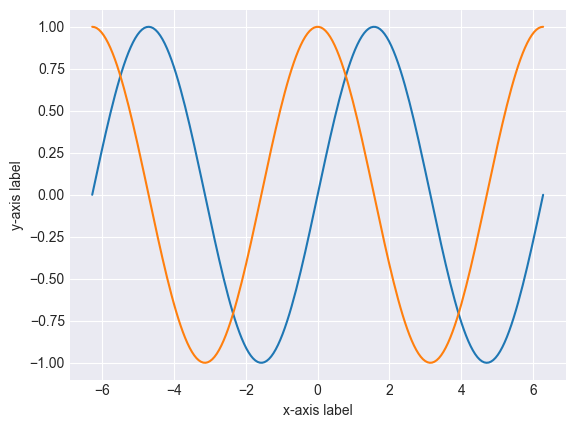

In [9]:
ax.set_xlabel('x-axis label')
ax.set_ylabel('y-axis label')
fig

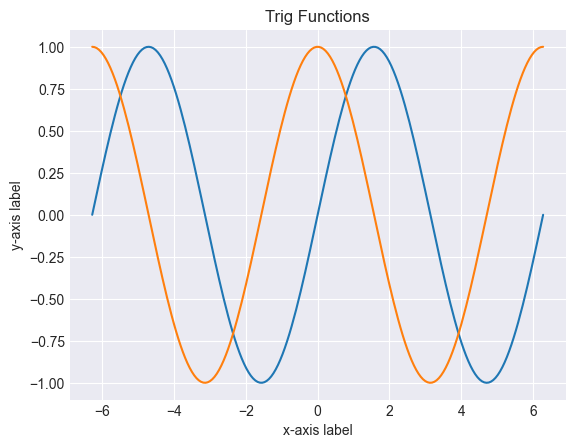

In [10]:
ax.set_title('Trig Functions')
fig

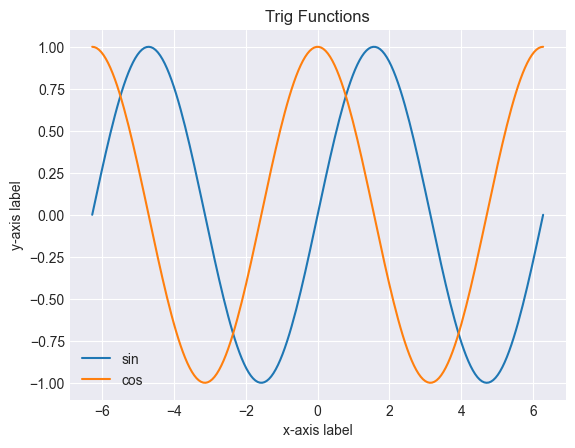

In [11]:
ax.legend()
fig

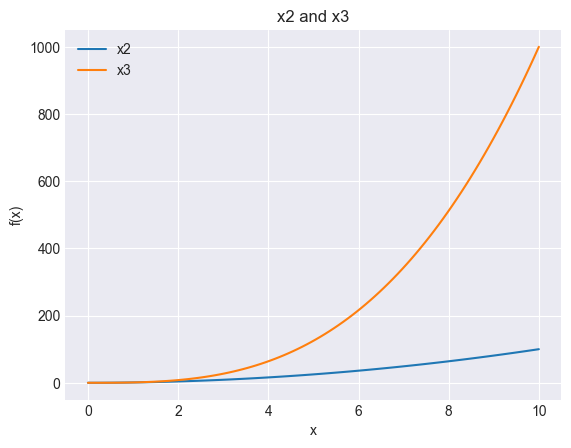

In [12]:
fix,ax = plt.subplots()
x_points = np.linspace(0,10,100)
# y_points = np.tan(x_points)
ax.plot(x_points, np.square(x_points), label='x2')
ax.plot(x_points,x_points**3, label='x3')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('x2 and x3')
ax.legend()

# Multiple Axes

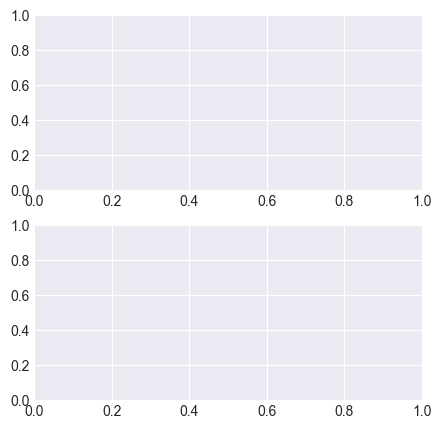

In [20]:
nrows = 2
ncols = 1

fig, axs = plt.subplots(nrows, ncols, figsize=(5,5))

In [21]:
axs

array([<Axes: >, <Axes: >], dtype=object)

In [22]:
x_vals = np.linspace(-2*np.pi, 2*np.pi,200)
axs[0].plot(x_vals, np.sin(x_vals))
axs[1].plot(x_vals, np.cos(x_vals))

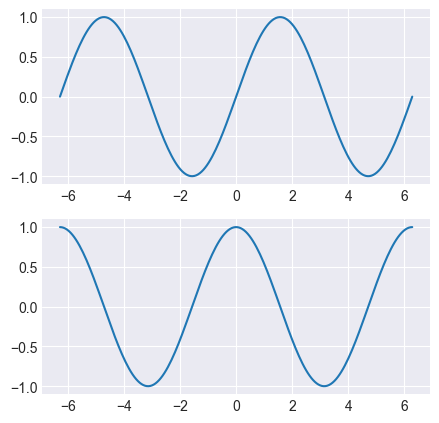

In [23]:
fig

In [17]:
df = pd.read_csv('data/DEXUSEU.csv')
df

,DATE,DEXUSEU
0,2015-04-03,1.0990
1,2015-04-06,1.1008
2,2015-04-07,1.0850
3,2015-04-08,1.0818
4,2015-04-09,1.0671
...,...,...
1301,2020-03-30,1.1018
1302,2020-03-31,1.1016
1303,2020-04-01,1.0934
1304,2020-04-02,1.0862


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     1306 non-null   object
 1   DEXUSEU  1306 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB


In [26]:
df.describe(include='all')

,DATE,DEXUSEU
count,1306,1306
unique,1306,787
top,2015-04-03,.
freq,1,55


In [27]:
df.iloc[0, 0], type(df.iloc[0, 0])

('2015-04-03', str)

In [31]:
dates = pd.to_datetime(df['DATE'], errors='coerce')
rates = pd.to_numeric(df['DEXUSEU'], errors='coerce')

In [40]:
rates[rates.isnull()]

36     NaN
65     NaN
111    NaN
136    NaN
158    NaN
169    NaN
190    NaN
195    NaN
206    NaN
226    NaN
301    NaN
326    NaN
371    NaN
396    NaN
420    NaN
429    NaN
451    NaN
456    NaN
466    NaN
470    NaN
491    NaN
561    NaN
587    NaN
631    NaN
656    NaN
680    NaN
689    NaN
711    NaN
716    NaN
726    NaN
751    NaN
821    NaN
848    NaN
891    NaN
916    NaN
941    NaN
949    NaN
958    NaN
971    NaN
972    NaN
977    NaN
986    NaN
991    NaN
1011   NaN
1013   NaN
1081   NaN
1109   NaN
1151   NaN
1181   NaN
1201   NaN
1214   NaN
1233   NaN
1238   NaN
1251   NaN
1271   NaN
Name: DEXUSEU, dtype: float64

In [43]:
rates.interpolate(method='linear', inplace=True)
rates[rates.isnull()]

Series([], Name: DEXUSEU, dtype: float64)

In [48]:
data = pd.concat([dates,rates],axis=1)

In [49]:
data

,DATE,DEXUSEU
0,2015-04-03,1.0990
1,2015-04-06,1.1008
2,2015-04-07,1.0850
3,2015-04-08,1.0818
4,2015-04-09,1.0671
...,...,...
1301,2020-03-30,1.1018
1302,2020-03-31,1.1016
1303,2020-04-01,1.0934
1304,2020-04-02,1.0862


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1306 non-null   datetime64[ns]
 1   DEXUSEU  1306 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.5 KB


In [58]:
data.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1301    False
1302    False
1303    False
1304    False
1305    False
Length: 1306, dtype: bool

In [59]:
data.isna().any(axis=0)

DATE       False
DEXUSEU    False
dtype: bool

In [60]:
data.isna().any(axis=1).sum()

np.int64(0)

In [61]:
data

,DATE,DEXUSEU
0,2015-04-03,1.0990
1,2015-04-06,1.1008
2,2015-04-07,1.0850
3,2015-04-08,1.0818
4,2015-04-09,1.0671
...,...,...
1301,2020-03-30,1.1018
1302,2020-03-31,1.1016
1303,2020-04-01,1.0934
1304,2020-04-02,1.0862


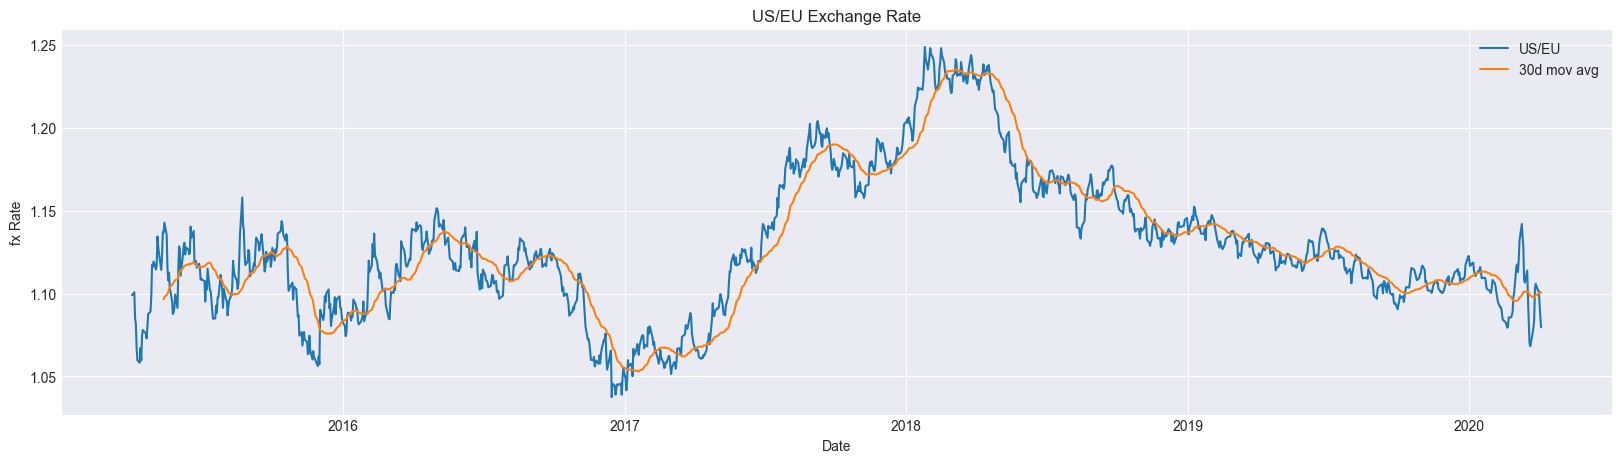

In [80]:
m5_avg = data['DEXUSEU'].rolling(window=30).mean()

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(data['DATE'], data['DEXUSEU'],label='US/EU')
ax.set_xlabel('Date')
ax.set_ylabel('fx Rate')
ax.set_title('US/EU Exchange Rate')

ax.plot(data['DATE'], m5_avg, label='30d mov avg')
ax.legend()

In [99]:
mpl.style.use('seaborn-v0_8-pastel')

In [92]:
import random

In [93]:
x_vals = np.random.randint(1,100, 50)
x_vals

array([79, 89, 12, 66, 70,  3, 99, 91, 84, 52, 61, 73,  6, 89, 18, 13, 57,
       81, 84,  6, 25, 29, 79, 56, 79, 73, 83, 72, 26,  3, 89, 47, 70, 26,
        6, 60, 67, 72, 86, 27, 61, 75, 92, 42, 26, 39, 23, 38, 20, 51])

In [94]:
y_vals = np.random.randint(1,50, 50)
y_vals

array([ 5, 48,  4, 45, 48, 49, 43, 11,  2, 11, 35, 49, 41, 24,  7, 43, 29,
       40, 11, 24, 44, 10, 13,  8, 38, 47,  8,  7,  1, 49, 36, 46, 30, 12,
       36, 19,  1,  8, 18,  9, 48, 14, 43,  2, 39, 37, 18, 27, 32, 37])

In [97]:
size_ = np.random.random(50)*100
size_

array([87.23121591, 68.91560714, 42.59746739,  2.86369684, 18.61172472,
       57.97548989, 88.29710494, 79.64156288, 62.63219622, 55.58229503,
       94.7779389 , 83.1429052 , 64.77796369, 53.40817754, 76.32184505,
       64.06716927, 29.63596575,  7.74703261, 66.2461429 , 76.08047604,
       17.42826842, 33.63616964, 55.53676997, 82.21108172, 78.19100725,
       54.84044598, 16.77644305, 90.66779556, 22.61730948, 20.24739054,
       36.23073156,  3.86520669, 32.21161976,  6.52185415, 71.8890167 ,
       98.26056993, 12.64953344, 83.42595714, 37.60292505, 23.51919156,
       23.48723611, 15.1072676 , 74.19343135, 73.30730833, 85.97988721,
       67.75108878,  5.86988425,  9.44596739, 50.7545424 , 52.81025767])

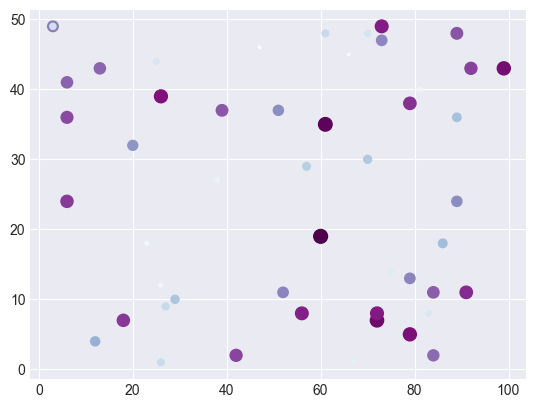

In [118]:
fig, ax = plt.subplots()
ax.scatter(x_vals, y_vals, s=size_, c=size_, cmap='BuPu')

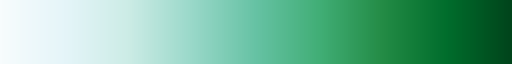

In [110]:
plt.get_cmap()

In [117]:
plt.set_cmap('virdis')

ValueError: 'virdis' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

# mplfinance

In [119]:
import mplfinance as mpf

In [120]:
data = pd.read_csv('data/appl.csv')
data

,Symbol,Date,Close,Volume,Open,High,Low
0,AAPL,10/29/2020,115.32,146129200,112.37,116.930,112.2000
1,AAPL,10/28/2020,111.20,143937800,115.05,115.430,111.1000
2,AAPL,10/27/2020,116.60,92276770,115.49,117.280,114.5399
3,AAPL,10/26/2020,115.05,111850700,114.01,116.550,112.8800
4,AAPL,10/23/2020,115.04,82572650,116.39,116.550,114.2800
5,AAPL,10/22/2020,115.75,101988000,117.45,118.040,114.5900
6,AAPL,10/21/2020,116.87,89945980,116.67,118.705,116.4500
7,AAPL,10/20/2020,117.51,124423700,116.20,118.980,115.6300
8,AAPL,10/19/2020,115.98,120639300,119.96,120.419,115.6600
9,AAPL,10/16/2020,119.02,115393800,121.28,121.548,118.8100


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Symbol   23 non-null     object 
 1    Date    23 non-null     object 
 2    Close   23 non-null     float64
 3    Volume  23 non-null     int64  
 4    Open    23 non-null     float64
 5    High    23 non-null     float64
 6    Low     23 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.4+ KB


In [122]:
data.describe(include='all')

,Symbol,Date,Close,Volume,Open,High,Low
count,23,23,23.000000,2.300000e+01,23.000000,23.000000,23.000000
unique,1,23,NaN,NaN,NaN,NaN,NaN
top,AAPL,10/29/2020,NaN,NaN,NaN,NaN,NaN
freq,23,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,116.614348,1.281513e+08,116.719565,118.374435,115.109761
std,NaN,NaN,3.009597,4.505733e+07,3.117406,3.019266,2.521056
min,NaN,NaN,111.200000,8.257265e+07,112.370000,115.310000,111.100000
25%,NaN,NaN,115.045000,1.002837e+08,114.585000,116.475000,113.560000
50%,NaN,NaN,115.980000,1.153938e+08,116.200000,117.260000,114.590000
75%,NaN,NaN,117.240000,1.443249e+08,118.180000,119.699500,116.140000


In [125]:
data.drop(['Symbol'],axis=1, inplace=True)

In [133]:
data.set_index([' Date'],inplace=True)

In [134]:
data

,Close,Volume,Open,High,Low
Date,,,,,
10/29/2020,115.32,146129200,112.37,116.930,112.2000
10/28/2020,111.20,143937800,115.05,115.430,111.1000
10/27/2020,116.60,92276770,115.49,117.280,114.5399
10/26/2020,115.05,111850700,114.01,116.550,112.8800
10/23/2020,115.04,82572650,116.39,116.550,114.2800
10/22/2020,115.75,101988000,117.45,118.040,114.5900
10/21/2020,116.87,89945980,116.67,118.705,116.4500
10/20/2020,117.51,124423700,116.20,118.980,115.6300
10/19/2020,115.98,120639300,119.96,120.419,115.6600


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries,  10/29/2020 to  09/29/2020
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    Close   23 non-null     float64
 1    Volume  23 non-null     int64  
 2    Open    23 non-null     float64
 3    High    23 non-null     float64
 4    Low     23 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1+ KB


In [137]:
mpf.plot(data)

TypeError: Expect data.index as DatetimeIndex

In [140]:
# to turn the index into DatetimeIndex

data.reset_index(inplace=True)

In [143]:
data.rename({' Date':'Date'},axis=1, inplace=True)

In [148]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     23 non-null     datetime64[ns]
 1    Close   23 non-null     float64       
 2    Volume  23 non-null     int64         
 3    Open    23 non-null     float64       
 4    High    23 non-null     float64       
 5    Low     23 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.2 KB


In [151]:
data.set_index(['Date'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2020-10-29 to 2020-09-29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    Close   23 non-null     float64
 1    Volume  23 non-null     int64  
 2    Open    23 non-null     float64
 3    High    23 non-null     float64
 4    Low     23 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


In [152]:
mpf.plot(data)

/Users/bharathreddy/PycharmProjects/baptiste/.venv/lib/python3.13/site-packages/mplfinance/_arg_validators.py:55: UserWarning: 
   Input DataFrame column name " Close" 
   contains leading and/or trailing whitespace.
  warnings.warn('\n ================================================================= '+
/Users/bharathreddy/PycharmProjects/baptiste/.venv/lib/python3.13/site-packages/mplfinance/_arg_validators.py:55: UserWarning: 
   Input DataFrame column name " Volume" 
   contains leading and/or trailing whitespace.
  warnings.warn('\n ================================================================= '+
/Users/bharathreddy/PycharmProjects/baptiste/.venv/lib/python3.13/site-packages/mplfinance/_arg_validators.py:55: UserWarning: 
   Input DataFrame column name " Open" 
   contains leading and/or trailing whitespace.
  warnings.warn('\n ================================================================= '+
/Users/bharathreddy/PycharmProjects/baptiste/.venv/lib/python3.13/site-packages/mp

ValueError: Column "Open" NOT FOUND in Input DataFrame!
            CHECK that your column names are correct AND/OR
            CHECK for leading or trailing blanks in your column names.

In [156]:
data.columns = [x.strip() for x in data.columns.to_list()]

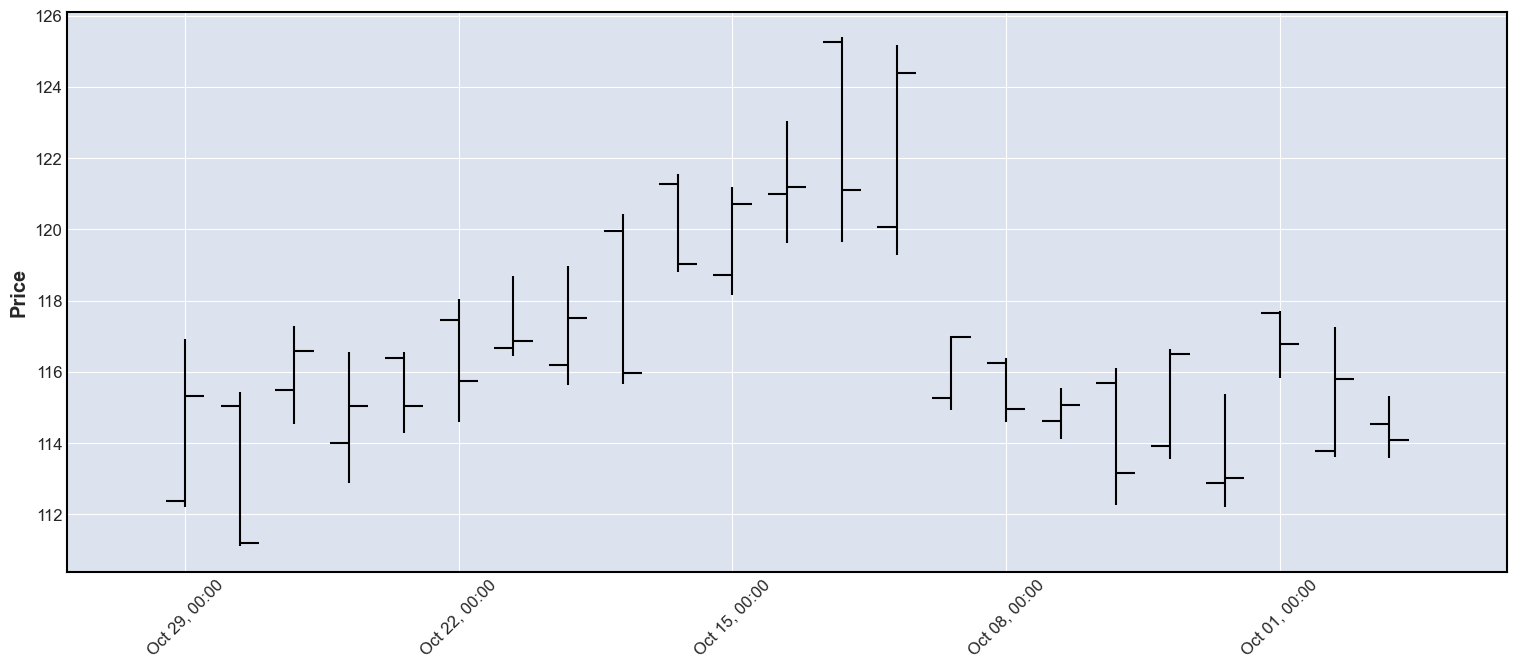

In [159]:
mpf.plot(data, figsize=(20,8))

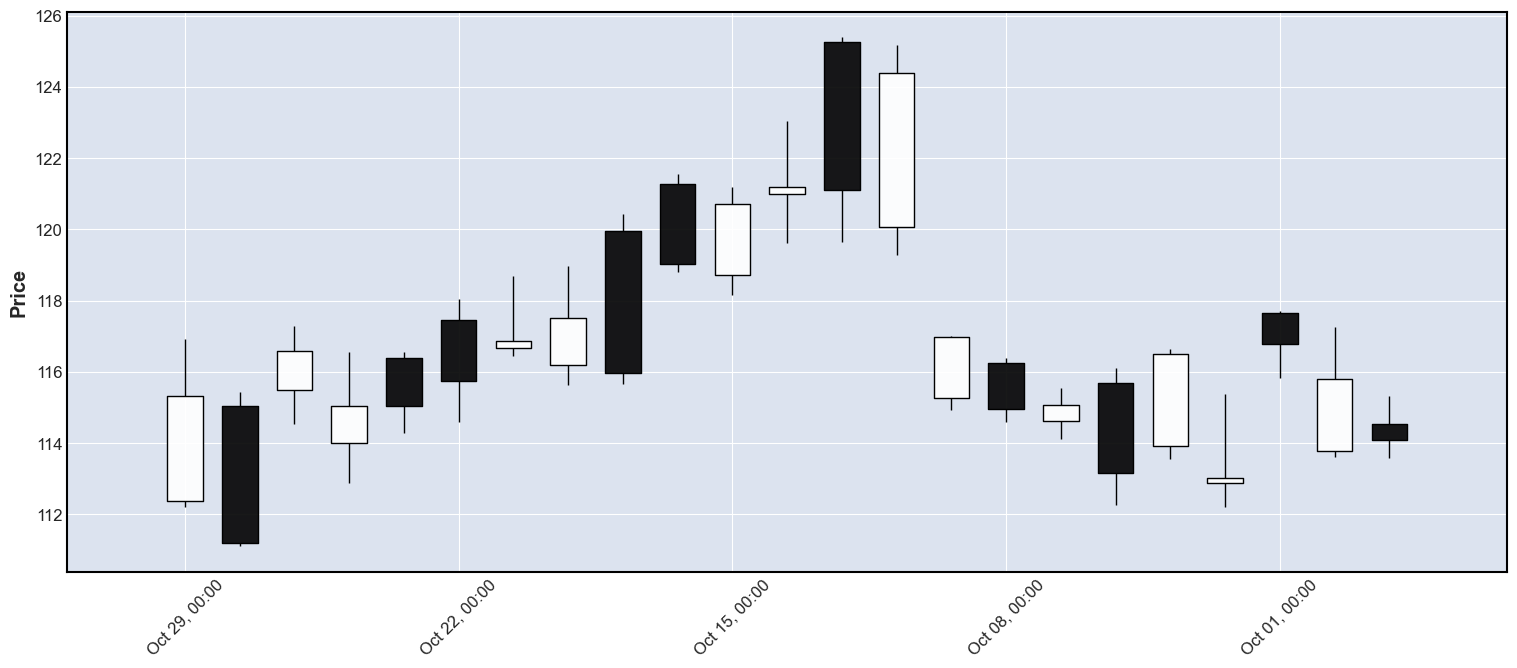

In [161]:
mpf.plot(data, type='candle', figsize=(20,8))

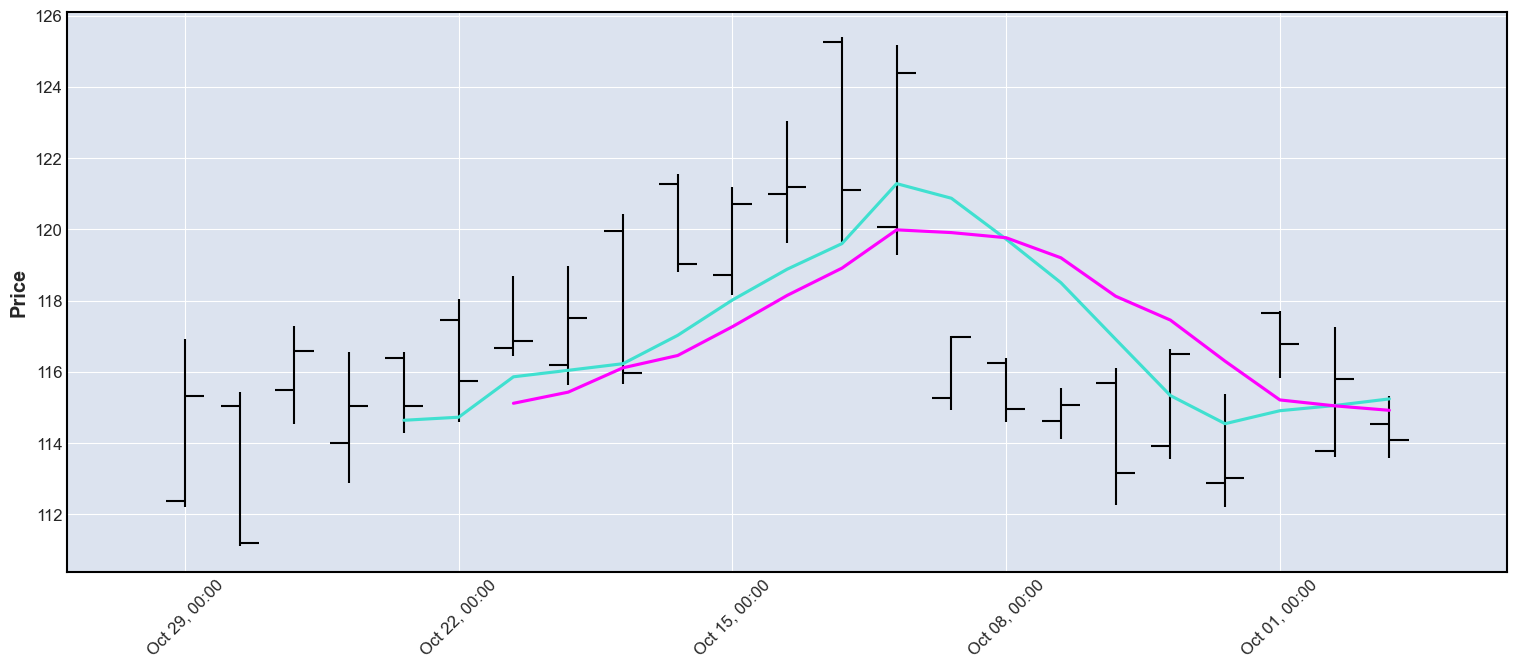

In [165]:
mpf.plot(
    data,
    mav=(5, 7),
    type='ohlc',
    figsize=(20, 8)
)

In [168]:
my_style = mpf.make_mpf_style(
    base_mpl_style='seaborn-darkgrid',
    mavcolors=['blue', 'xkcd:gold', '#8E44AD']
)

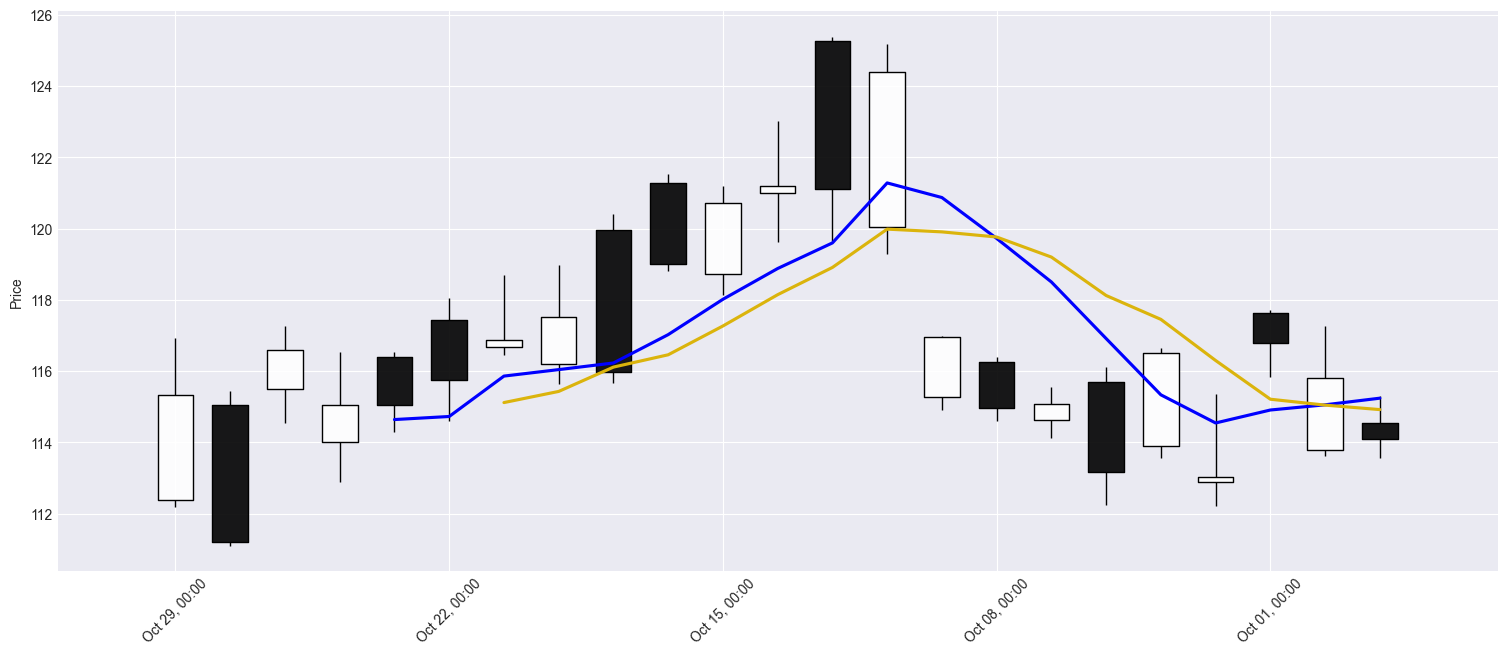

In [170]:
mpf.plot(
    data,
    mav=(5, 7),
    type='candle',
    figsize=(20, 8),
    style=my_style
)